In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import seaborn as sns

In [47]:
def make_plots(df_tup, ax, enemy):

    algorithms = ['Genetic Algorithm Uniform', 'Genetic Algorithm Alpha blend']

    for index, df in enumerate(df_tup):

        cmap = plt.colormaps.get_cmap('rainbow')
        norm = Normalize(vmin=0, vmax=len(df_tup)-1)
    
        df = df.groupby('generation').agg({'mean_fitness':['mean', 'std'], 'max_fitness':['mean', 'std']})
        df.columns = ['mean_fitness', 'mean_std', 'max_fitness', 'max_std']

        ax.plot(df['mean_fitness'], label = f'{algorithms[index]}', color=cmap(norm(index)), linestyle = '-')
        ax.plot(df['max_fitness'], color = cmap(norm(index)), linestyle = '--')
        ax.fill_between(df.index, df['mean_fitness'] - df['mean_std'], df['mean_fitness'] + df['mean_std'], color = cmap(norm(index)), alpha = 0.2)
        ax.fill_between(df.index, df['max_fitness'] - df['max_std'], df['max_fitness'] + df['max_std'], color = cmap(norm(index)), alpha = 0.2)

    ax.legend(fontsize=18)
    ax.set_ylabel('Fitness', fontsize=18)
    ax.set_xlabel('Generations', fontsize=18)
    ax.set_xscale('log')
    ax.set_yticks(range(0,101,10))
    ax.tick_params(axis='y', labelsize=18)  # Increase the y-axis tick label font size
    ax.set_title(f"Mean and max fitness per iteration\nEnemy {enemy}",fontsize=20)
    plt.xticks(fontsize=18, rotation=90)

def make_box_plots(df_tup, ax, enemy):
    algorithms = ['Genetic Algorithm Uniform', 'Genetic Algorithm Alpha blend']
    combined_df = pd.DataFrame() 

    for index, df in enumerate(df_tup):
        # Calculate 'gain'
        df['gain'] = df['player_life'] - df['enemy_life']
        df['algorithm'] = algorithms[index]
        combined_df = pd.concat([combined_df, df], axis=0) 
    sns.boxplot(x='algorithm', y='gain', data=combined_df, ax=ax)

    ax.set_title(f'Gain Boxplot for Enemy {enemy}', fontsize=20)
    ax.set_ylabel('Gain (Player Life - Enemy Life)', fontsize=18)
    ax.set_xlabel('Algorithm', fontsize=20)
    ax.set_yticks(range(-100, 101, 10))
    ax.axhline(y=0, color='black', linestyle='--')
    
    plt.xticks(fontsize=18, rotation=0)

    return combined_df




import os

def read_results(tests):
    ls = ()

    for test in tests:
        filename = test

        with open(filename, 'r') as file:
            df = []
        
            results = file.readlines()
            for line in results:
                a = line.split(' ')
                a[-1] = a[-1].strip()
                df.append(a)

            # Create DataFrame with appropriate columns based on file type
            if 'GA_'in test:
                df = pd.DataFrame(df, columns=['generation', 'max_fitness', 'mean_fitness', 'std_fitness', 'round'])
            else:
                df = pd.DataFrame(df, columns=['fitness', 'player_life', 'enemy_life'])


            df = df.dropna()
            df = df.astype(float)

            ls = ls + (df,)

    return ls

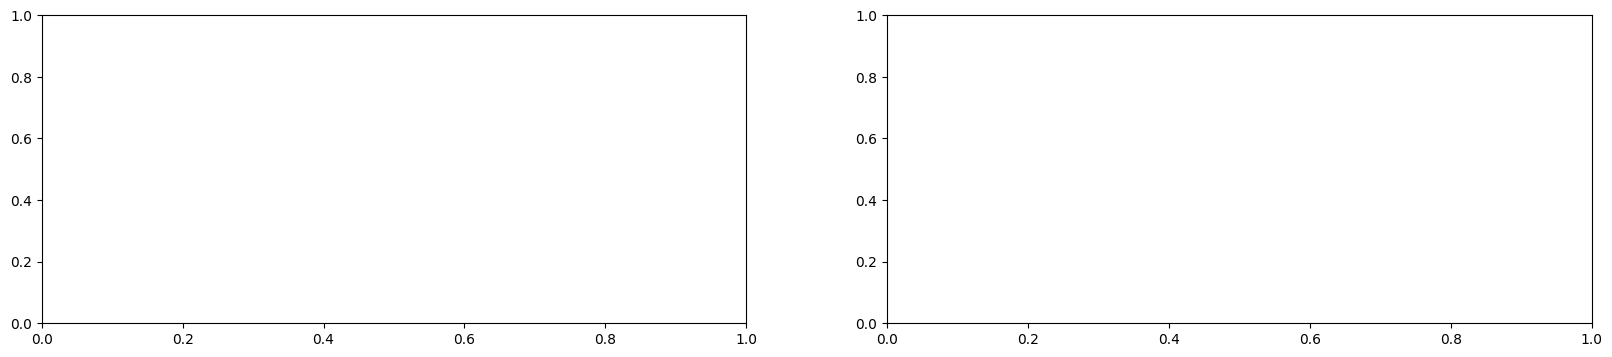

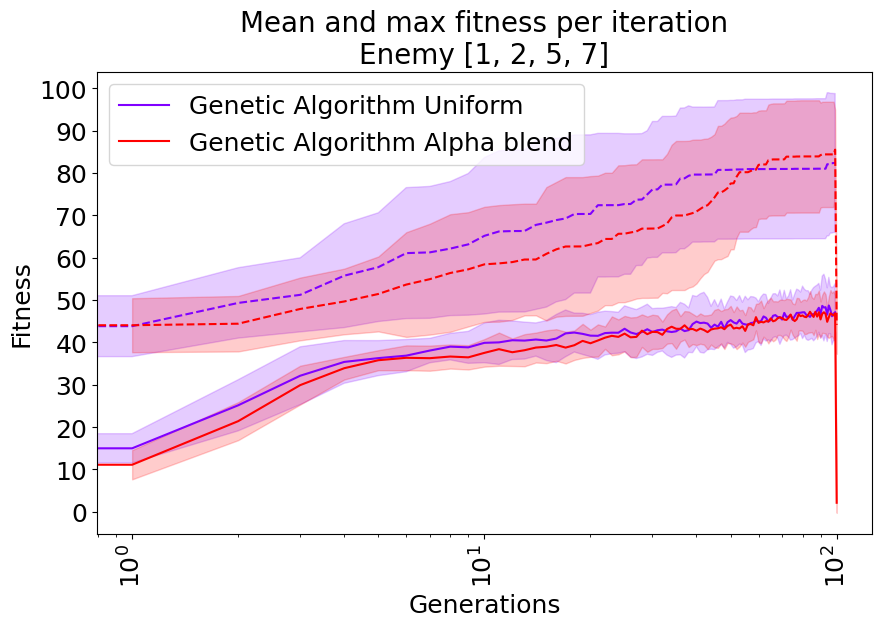

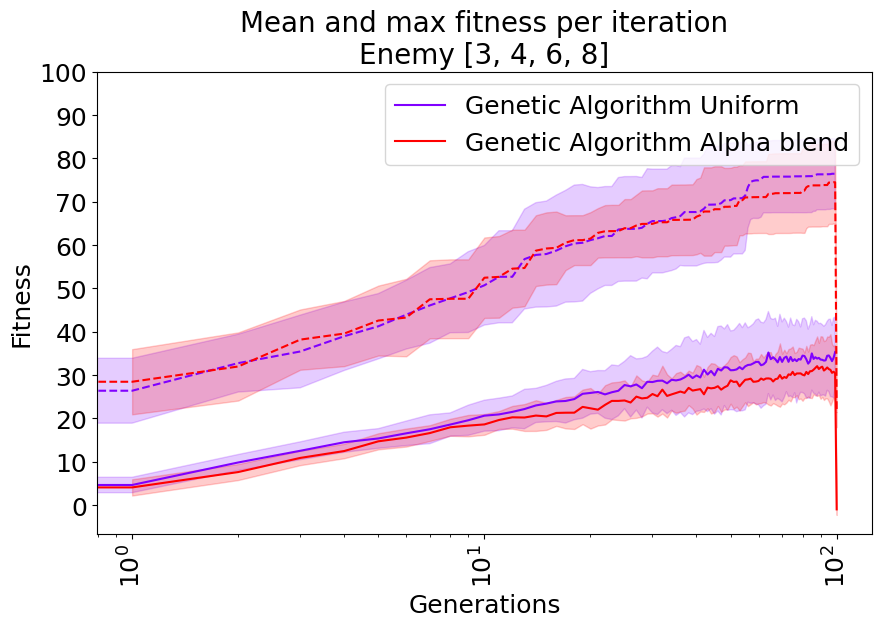

In [57]:
ga_norm_files = {'GA_G1/results.txt':[1,2,5,7], 'GA_G2/results.txt':[3,4,6,8]}
ga_mod_files = {'GA_AB_G1/results.txt':[1,2,5,7], 'GA_AB_G2/results.txt':[3,4,6,8]}

fig, axes = plt.subplots(1, 2, figsize=(20, 4)) 
keys_list_norm = list(ga_norm_files.keys())
keys_list_mod = list(ga_mod_files.keys())
for i in range(0, 2):
    df_tup = read_results([keys_list_norm[i], keys_list_mod[i]])

    # Create a new figure and axis for each plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjusted figure size for each individual plot
    make_plots(df_tup, ax, ga_norm_files[keys_list_norm[i]])

    # Show or save the figure
    plt.show()

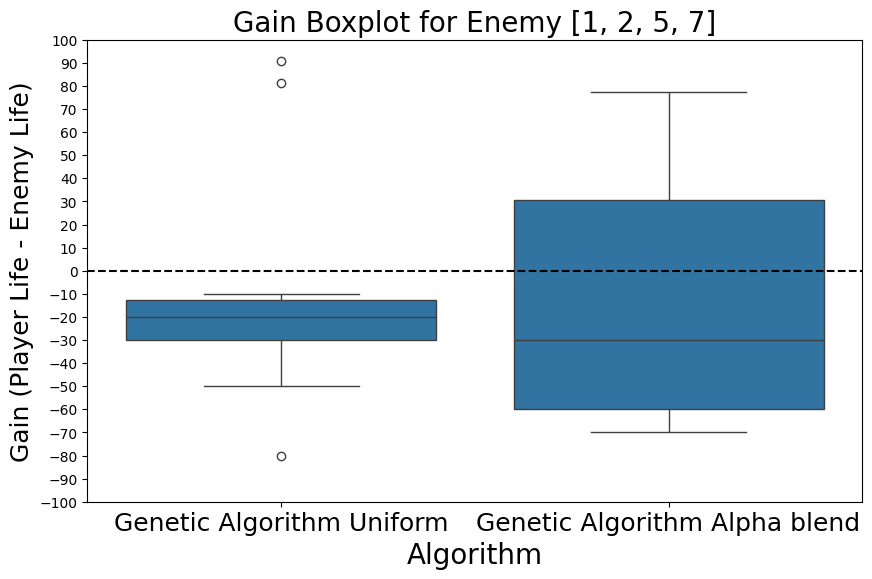

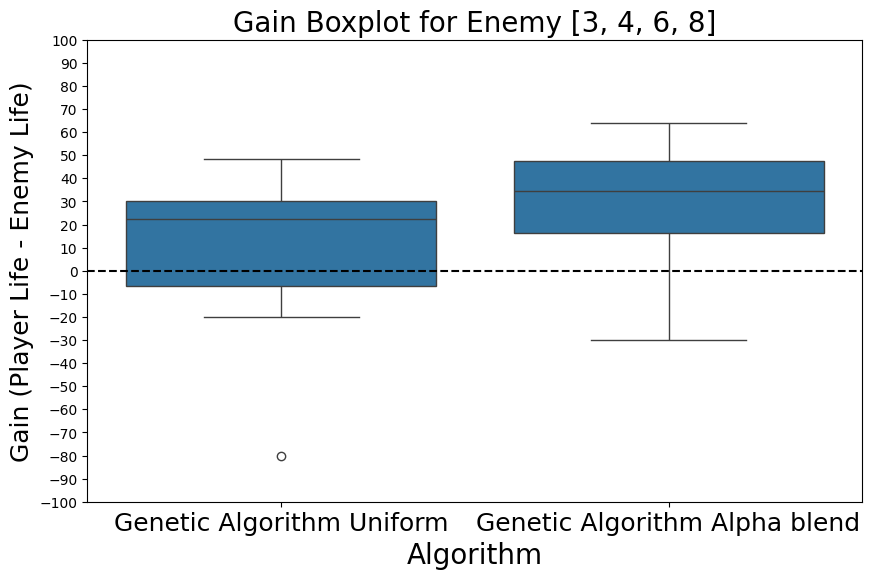

In [59]:
# over 10 runs welke individu was beste : individu is vector met 265 weights
# test 5x tegen enemy 4 leidend tot 5 scores -> gain : mijn leefpoints - enemy van 100 tot -100 -> positief dan gewonnen
# 5x scores en maak barplot en vergelijk
# voor alle 3 de enemies

de_norm_files = {'/home/vaino/Documents/GitHub/EvolutionaryComputing/Evolutionary-Computing-Task-1/NORM_[1, 2, 5, 7]/results.txt':[1,2,5,7], '/home/vaino/Documents/GitHub/EvolutionaryComputing/Evolutionary-Computing-Task-1/NORM_[3, 4, 6, 8]/results.txt':[3,4,6,8]}
de_mod_files = {'/home/vaino/Documents/GitHub/EvolutionaryComputing/Evolutionary-Computing-Task-1/AB_[1, 2, 5, 7]/results.txt':[1,2,5,7], '/home/vaino/Documents/GitHub/EvolutionaryComputing/Evolutionary-Computing-Task-1/AB_[3, 4, 6, 8]/results.txt':[3,4,6,8]}
keys_list_norm = list(de_norm_files.keys())
keys_list_mod = list(de_mod_files.keys())

ls = []
# Loop to create separate figures for each box plot
for i in range(0, 2):
    df_tup = read_results([keys_list_norm[i], keys_list_mod[i]])

    # Create a new figure and axis for each plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjusted figure size for each individual plot
    df = make_box_plots(df_tup, ax, de_norm_files[keys_list_norm[i]])

    # Show or save the figure
    plt.show()
    
    # Append the combined dataframe
    ls.append(df)


In [165]:
ls[0]

,fitness,player_life,enemy_life,gain,algorithm
0,92.327000,76.0,0.0,76.0,Differential Evolution
1,92.982720,80.0,0.0,80.0,Differential Evolution
2,92.982720,80.0,0.0,80.0,Differential Evolution
3,92.982720,80.0,0.0,80.0,Differential Evolution
4,86.802788,18.0,0.0,18.0,Differential Evolution
0,88.333532,42.0,0.0,42.0,Genetic Algorithm
1,66.036421,0.0,20.0,-20.0,Genetic Algorithm
2,92.972379,86.0,0.0,86.0,Genetic Algorithm
3,66.036421,0.0,20.0,-20.0,Genetic Algorithm
4,92.972379,86.0,0.0,86.0,Genetic Algorithm


In [2]:
input_filename = "GA_AB_G2/results.txt"  # Replace with your input file name
output_filename = "GA_AB_G2/output.txt"  # Replace with your desired output file name

with open(input_filename, "r") as infile, open(output_filename, "w") as outfile:
    generation_counter = 0

    for line in infile:
        parts = line.split(' ')
        # Replace the first element with the correct generation counter
        parts[0] = str(generation_counter)
        # Write the updated line to the output file
        outfile.write(" ".join(parts))

        # Update the generation counter and reset to 1 after reaching 100
        generation_counter += 1
        if generation_counter > 100:
            generation_counter = 1